# Tensors
Where the magic begins!

In [1]:
import torch
f'PyTorch v{torch.__version__}, GPU: {torch.cuda.is_available()}'

'PyTorch v1.5.0, GPU: True'

In [2]:
x = torch.randint(255, (3, 3), dtype=torch.float)
y = torch.rand(3, 3)
print(x, '\n', y)

tensor([[191.,  89., 173.],
        [ 20., 204., 232.],
        [122.,  18., 173.]]) 
 tensor([[0.7113, 0.6239, 0.0638],
        [0.5682, 0.4671, 0.5599],
        [0.0373, 0.0279, 0.1606]])


In [3]:
x.add_(y)
x

tensor([[191.7113,  89.6239, 173.0638],
        [ 20.5682, 204.4671, 232.5599],
        [122.0373,  18.0279, 173.1606]])

# Make our square nines

In [4]:
X = torch.randint(255, (400, 3, 3), dtype=torch.float)
X

tensor([[[172., 251., 234.],
         [ 53.,  68., 191.],
         [135., 204., 142.]],

        [[250.,  84.,   8.],
         [ 16., 120., 153.],
         [215., 237.,  50.]],

        [[ 13., 131.,  57.],
         [ 89., 160.,  70.],
         [128.,  71., 173.]],

        ...,

        [[210.,  16., 177.],
         [101., 110., 229.],
         [111.,  99., 164.]],

        [[ 57., 253., 172.],
         [191., 137., 141.],
         [ 61.,  84.,  65.]],

        [[231., 207., 174.],
         [253.,   6., 231.],
         [ 74.,  87., 254.]]])

In [5]:
X = X.view(-1, 9)
X

tensor([[172., 251., 234.,  ..., 135., 204., 142.],
        [250.,  84.,   8.,  ..., 215., 237.,  50.],
        [ 13., 131.,  57.,  ..., 128.,  71., 173.],
        ...,
        [210.,  16., 177.,  ..., 111.,  99., 164.],
        [ 57., 253., 172.,  ...,  61.,  84.,  65.],
        [231., 207., 174.,  ...,  74.,  87., 254.]])

In [6]:
w = [[1, 1, 1, 0, 0, 0, 0, 0, 0], 
     [0, 0, 0, 1, 1, 1, 0, 0, 0], 
     [0, 0, 0, 0, 0, 0, 1, 1, 1]]

magic_w = torch.tensor(w, dtype=torch.float)
X.mm(magic_w.t())

tensor([[657., 312., 481.],
        [342., 289., 502.],
        [201., 319., 372.],
        ...,
        [403., 440., 374.],
        [482., 469., 210.],
        [612., 490., 415.]])

In [7]:
y = torch.argmax(X.mm(magic_w.t()), 1)
y

tensor([0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 0, 0, 2, 1, 2, 1, 0, 1, 0, 1, 0,
        0, 1, 0, 1, 2, 0, 1, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 1, 2,
        1, 2, 2, 0, 2, 0, 2, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 2,
        1, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 0, 0, 1, 0, 0,
        0, 2, 1, 1, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 2, 0, 2, 1, 1, 0, 2, 1, 2,
        2, 2, 1, 1, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 1, 2, 2, 0, 0, 0,
        2, 0, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 2, 2, 1, 0, 1,
        2, 0, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 2, 1, 2, 0, 0, 2, 2, 1, 0, 0, 1,
        0, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 0, 0, 2, 1,
        2, 0, 0, 2, 1, 1, 0, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0,
        1, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2, 2,
        2, 1, 1, 2, 1, 1, 0, 1, 0, 2, 2,

In [8]:
y = torch.zeros(400, 3, dtype=torch.float).scatter_(1, y.view(-1, 1), value=1)
y

tensor([[1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])

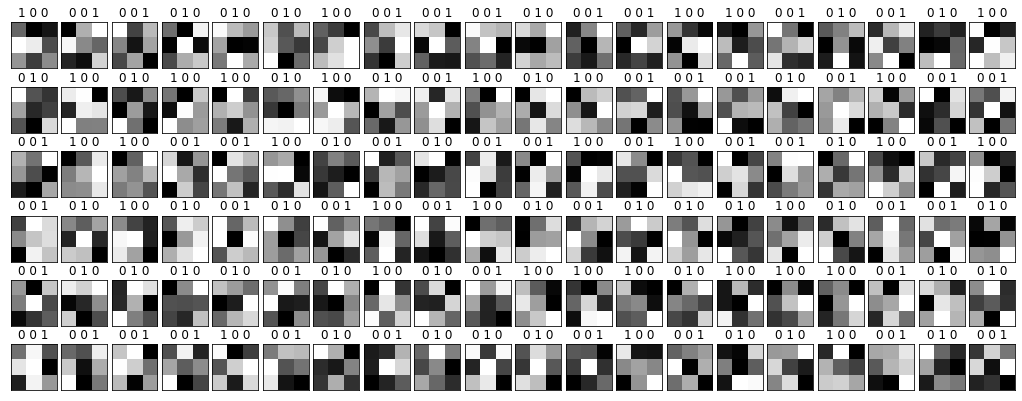

In [9]:
from utils.draw import draw_xy

draw_xy(X, y)